# FeatureEngineering dataset2, Naive Bayes classifier,RandomForestClassifier-LogisticRegression.

The following notebook has focused on feature engineering based on, ”DayOfWeek”, “PdDistrict”, ”hour”, "DayOfYear",and “year” variables and after extracnign dummy variables it has 415 Colum. 

After exploring different models, this dataset dose not seams to providing an improve modeling scores.


In [1]:
%load_ext watermark
%watermark -a 'Sohrab' -u -d -v -p numpy,pandas,matplotlib
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import cross_validation,preprocessing

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Sohrab 
last updated: 2016-08-31 

CPython 3.5.2
IPython 4.2.0

numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.1


In [2]:
#Load Data with pandas, and parse the first column into datetime
train=pd.read_csv('../../Dataset/train-2.csv', parse_dates = ['Dates'])
train['DayOfYear'] = train['Dates'].map(lambda x: x.strftime("%m-%d"))
train['hour'] = train.Dates.dt.hour
train['year'] = train.Dates.dt.year

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,DayOfYear,hour,year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,05-13,23,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,05-13,23,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,05-13,23,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,05-13,23,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,05-13,23,2015


In [4]:
cate_variables = ['DayOfWeek','PdDistrict','hour','year','DayOfYear']
dfTrain = pd.DataFrame()

for var_name in cate_variables: 
    
    df = pd.get_dummies(train[var_name]) 
    train = train.drop([var_name], axis = 1)
    
    if dfTrain.empty:
        dfTrain = df
    else:
        dfTrain = dfTrain.join(df)
        
crimeCat = preprocessing.LabelEncoder()
crime = crimeCat.fit_transform(train.Category)   
dfTrain['crime']=crime

In [5]:
dfTrain.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,...,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,crime
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16


By comparing the performance of the following model on dataset2 with result from the same model on dataset1 we can see that this model is not performing as well as before, thus not suitable for the current dataset. 


alpha:  10 LogLoss:  2.58313563897
alpha:  30 LogLoss:  2.6760887283
alpha:  50 LogLoss:  2.77910174764
alpha:  70 LogLoss:  2.88361544721
alpha:  90 LogLoss:  2.99709996625
alpha:  110 LogLoss:  3.11634307398
alpha:  130 LogLoss:  3.23097162877
alpha:  150 LogLoss:  3.34400036117
alpha:  170 LogLoss:  3.45461644811
alpha:  190 LogLoss:  3.56593185496
alpha:  210 LogLoss:  3.66960125691
alpha:  230 LogLoss:  3.77211015505
alpha:  250 LogLoss:  3.86698973369
alpha:  270 LogLoss:  3.96153379559
alpha:  290 LogLoss:  4.05762286891
alpha:  310 LogLoss:  4.15505990459
alpha:  330 LogLoss:  4.25142004687
alpha:  350 LogLoss:  4.34529139622
alpha:  370 LogLoss:  4.44006689266
alpha:  390 LogLoss:  4.53584594174
alpha:  410 LogLoss:  4.63253475007
alpha:  430 LogLoss:  4.72997530165
alpha:  450 LogLoss:  4.82412803128
alpha:  470 LogLoss:  4.90803440933
alpha:  490 LogLoss:  4.98438869134
alpha:  510 LogLoss:  5.06026818205
alpha:  530 LogLoss:  5.1368525484
alpha:  550 LogLoss:  5.21410397391

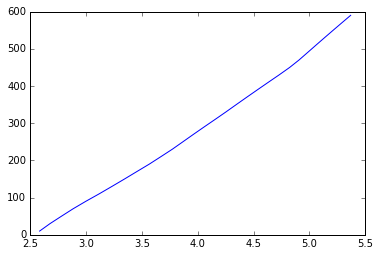

In [6]:
LLscores = []
for a in range (10, 600, 20):
    
    model = BernoulliNB(alpha = a)
    
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("alpha: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'alpha': range(10, 600, 20), 'LogLoss': LLscores})
df= df.set_index(['LogLoss'])
plt.plot(df)

Although the following code was interrupted before finishing, due to my limited ram, but what we can learn from the reported log_loss value is that, larger value of min_sample_split reduces overfitting for each value of n_estimators. I have also, confirmed this conclusion by submitting a “RandomForestClassifier” model with log_loss of 1.23887 which resulted in 8.79 Kaggle score.  


n_estimators:  10 LogLoss:  2.41550642738
n_estimators:  30 LogLoss:  2.39834190119
n_estimators:  50 LogLoss:  2.39629331848
n_estimators:  70 LogLoss:  2.39384815593
n_estimators:  90 LogLoss:  2.39199087614
n_estimators:  110 LogLoss:  2.39138504495
n_estimators:  130 LogLoss:  2.39129151008
n_estimators:  150 LogLoss:  2.39084649991
n_estimators:  170 LogLoss:  2.39098189253
n_estimators:  190 LogLoss:  2.39085204548
n_estimators:  210 LogLoss:  2.39068019427
n_estimators:  230 LogLoss:  2.38965386298
n_estimators:  250 LogLoss:  2.38983532992
n_estimators:  270 LogLoss:  2.38993769738
n_estimators:  290 LogLoss:  2.38970259114
n_estimators:  310 LogLoss:  2.38967006895
n_estimators:  330 LogLoss:  2.38963795524
n_estimators:  350 LogLoss:  2.38985212198
n_estimators:  370 LogLoss:  2.38951139686
n_estimators:  390 LogLoss:  2.38937384325
n_estimators:  410 LogLoss:  2.38939529747


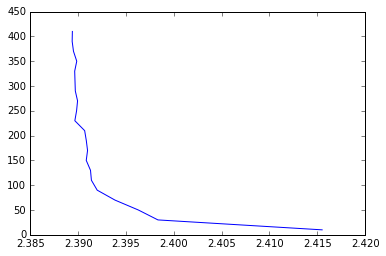

In [7]:
LLscores = []
for a in range (10, 420, 20):
    model = RandomForestClassifier(n_estimators = a , 
                                       min_samples_split = 500, 
                                       criterion = 'entropy', 
                                       n_jobs = -1)
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("n_estimators: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'n_estimators': range(10, 420, 20), 'LogLoss': LLscores})
df= df.set_index(['LogLoss'])
plt.plot(df)

min_samples_split:  10 LogLoss:  1.22549580215
min_samples_split:  30 LogLoss:  1.64991344036
min_samples_split:  50 LogLoss:  1.82769150363
min_samples_split:  70 LogLoss:  1.93081987573
min_samples_split:  90 LogLoss:  2.00786887823
min_samples_split:  110 LogLoss:  2.06815424211
min_samples_split:  130 LogLoss:  2.11776634831
min_samples_split:  150 LogLoss:  2.16033757308
min_samples_split:  170 LogLoss:  2.19443611125
min_samples_split:  190 LogLoss:  2.22266000483
min_samples_split:  210 LogLoss:  2.24700255198
min_samples_split:  230 LogLoss:  2.26809022976
min_samples_split:  250 LogLoss:  2.28496856327
min_samples_split:  270 LogLoss:  2.29975819829
min_samples_split:  290 LogLoss:  2.31256992533
min_samples_split:  310 LogLoss:  2.32490100675
min_samples_split:  330 LogLoss:  2.33451468255
min_samples_split:  350 LogLoss:  2.34353720253
min_samples_split:  370 LogLoss:  2.35183652091
min_samples_split:  390 LogLoss:  2.35984365807
min_samples_split:  410 LogLoss:  2.365839231

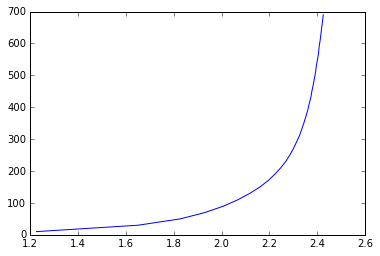

In [8]:
LLscores = []
for a in range (10, 700, 20):
    model = RandomForestClassifier(n_estimators = 200 , 
                                       min_samples_split = a, 
                                       criterion = 'entropy', 
                                       n_jobs = -1)
    model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
    predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
    score = log_loss(dfTrain['crime'], predicted) 
    print ("min_samples_split: ", a, "LogLoss: ", score)
    LLscores.append(score)
df  = pd.DataFrame({'min_samples_split': range(10, 700, 20),'LogLoss': LLscores})
df= df.set_index(['LogLoss'])
plt.plot(df)


# Making a prediction on the test data set

Initially we need to convert the test dataset to dummy variables similar to what we did to make “dfTrain”.



In [9]:
test=pd.read_csv('../../Dataset/test-2.csv', parse_dates = ['Dates'])
test['DayOfYear'] = test['Dates'].map(lambda x: x.strftime("%m-%d"))
test['hour'] = test.Dates.dt.hour
test['year'] = test.Dates.dt.year

cate_variables = ['DayOfWeek','PdDistrict','hour','year','DayOfYear']
dfTest = pd.DataFrame()

for var_name in cate_variables: 
    
    df = pd.get_dummies(test[var_name]) 
    test = test.drop([var_name], axis = 1)
    
    if dfTest.empty:
        dfTest = df
    else:
        dfTest = dfTest.join(df)


In [10]:
dfTest = dfTest.drop(['01-03', '01-04'], axis = 1)

In [11]:
dfTest.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,...,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## RandomForestClassifier

The following model has a log_loss value of 2.308 on the test dataset1 with the Kaggle score of 2.847. However, this model perform differently on dataset2, as we have 2.0052 and 2.63824.  as our log_loss for dataset2 and Kaggle respectively. 



In [12]:
model = RandomForestClassifier(n_estimators = 400 , 
                               min_samples_split = 90, 
                               criterion = 'entropy',
                               n_jobs = -1)

model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
log_loss(dfTrain['crime'], predicted)

2.0056582500793381

In [13]:
predicted = model.predict_proba(dfTest)
result=pd.DataFrame(predicted, columns =crimeCat.classes_)
result.to_csv('../../Prediction/RandomForestClassifier_DS2.csv', index = True, index_label = 'Id' )

This model that has the log_loss of 2.3900 give a 2.56066 score in Kaggle. This means that the higher the min_sample_split the more accurate the model works on the test data set. 


In [14]:
model = RandomForestClassifier(n_estimators = 400 , 
                               min_samples_split = 500, 
                               criterion = 'entropy',
                               n_jobs = -1)

model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
log_loss(dfTrain['crime'], predicted)

2.3897772059171234

In [15]:
predicted = model.predict_proba(dfTest)
result=pd.DataFrame(predicted, columns =crimeCat.classes_)
result.to_csv('../../Prediction/RandomForestClassifier_DS2.csv', index = True, index_label = 'Id' )

This model that has the log_loss of 2.4262 give a 2.55954 score in Kaggle. This means that the higher the min_sample_split the more accurate the model works on the test data set.

In [16]:
model = RandomForestClassifier(n_estimators = 200 , 
                               min_samples_split = 700, 
                               criterion = 'entropy',
                               n_jobs = -1)

model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
log_loss(dfTrain['crime'], predicted)

2.4254977465355543

In [17]:
predicted = model.predict_proba(dfTest)
result=pd.DataFrame(predicted, columns =crimeCat.classes_)
result.to_csv('../../Prediction/RandomForestClassifier_DS2.csv', index = True, index_label = 'Id' )

This model that has the log_loss of 2.45858 give a 2.55960 score in Kaggle. This means that the higher the min_sample_split the more accurate the model works on the test data set.

In [18]:
model = RandomForestClassifier(n_estimators = 200 , 
                               min_samples_split = 1000, 
                               criterion = 'entropy',
                               n_jobs = -1)

model.fit(dfTrain.drop(['crime'], axis = 1), dfTrain['crime'])
predicted = np.array(model.predict_proba(dfTrain.drop(['crime'], axis = 1)))
log_loss(dfTrain['crime'], predicted)

2.4588327306305091

In [19]:
predicted = model.predict_proba(dfTest)
result=pd.DataFrame(predicted, columns =crimeCat.classes_)
result.to_csv('../../Prediction/RandomForestClassifier_DS2.csv', index = True, index_label = 'Id' )